In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv(r"C:\Users\asus\Desktop\Datasets\NewspaperData.csv")
df.head()

Newspaper    daily   sunday
0       Baltimore Sun  391.952  488.506
1        Boston Globe  516.981  798.298
2       Boston Herald  355.628  235.084
3  Charlotte Observer  238.555  299.451
4   Chicago Sun Times  537.780  559.093

In [3]:
# select relevent columns

In [4]:
df = df[['daily','sunday']]

df

daily    sunday
0    391.952   488.506
1    516.981   798.298
2    355.628   235.084
3    238.555   299.451
4    537.780   559.093
5    733.775  1133.249
6    198.832   348.744
7    252.624   417.779
8    206.204   344.522
9    231.177   323.084
10   449.755   620.752
11   288.571   423.305
12   185.736   202.614
13  1164.388  1531.527
14   444.581   553.479
15   412.871   685.975
16   272.280   324.241
17   781.796   983.240
18  1209.225  1762.015
19   825.512   960.308
20   223.748   284.611
21   354.843   407.760
22   515.523   982.663
23   220.465   557.000
24   337.672   440.923
25   197.120   268.060
26   133.239   262.048
27   374.009   432.502
28   273.844   338.355
29   570.364   704.322
30   391.286   585.681
31   201.860   267.781
32   321.626   408.343
33   838.902  1165.567

In [5]:
#data description
df.describe()

daily       sunday
count    34.000000    34.000000
mean    430.962471   591.202412
std     269.211470   376.418051
min     133.239000   202.614000
25%     233.021500   327.769500
50%     355.235500   436.712500
75%     516.616500   699.735250
max    1209.225000  1762.015000

In [6]:
#data distribution

<AxesSubplot:xlabel='daily', ylabel='Density'>

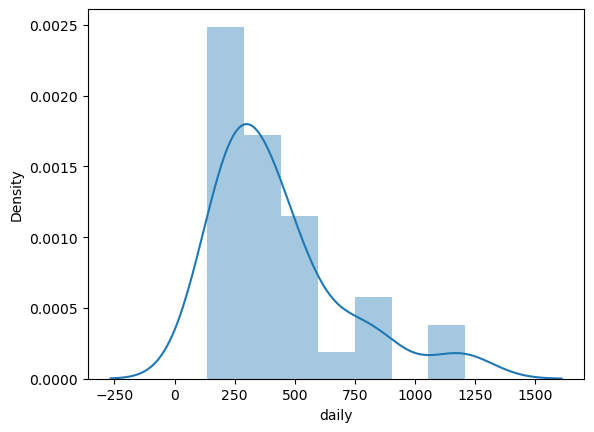

In [7]:
sns.distplot(df['daily'])

<AxesSubplot:xlabel='daily', ylabel='Density'>

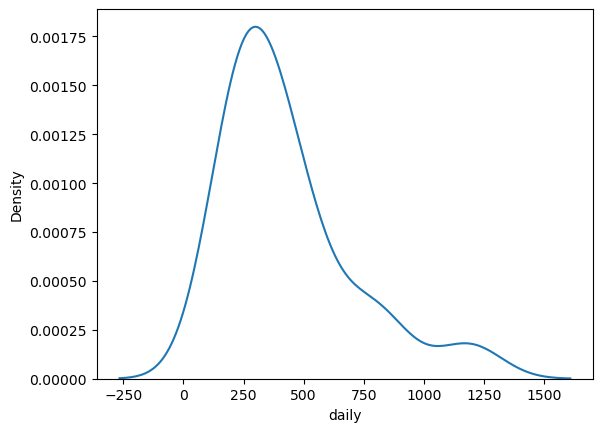

In [8]:
sns.kdeplot(df['daily'])

In [9]:
#Correlation analysis

<AxesSubplot:xlabel='daily', ylabel='sunday'>

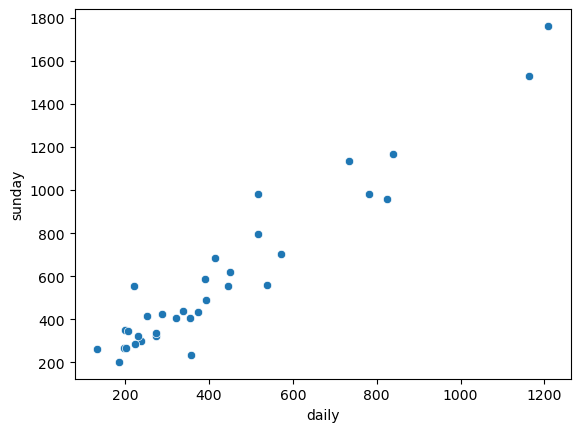

In [10]:
sns.scatterplot(df['daily'],df['sunday'])

In [11]:
df.corr()

daily    sunday
daily   1.000000  0.958154
sunday  0.958154  1.000000

<AxesSubplot:>

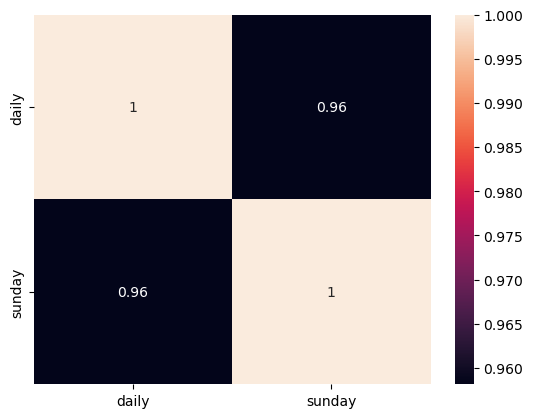

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
#Import statsmodels

In [14]:
import statsmodels.formula.api as smf

In [20]:
model = smf.ols('sunday~daily',data=df).fit()

In [19]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [22]:
# Line equation
x=500
y=1.33*x+13.83
y

678.83

In [24]:
# print values for t value and p value
print(f"t value is\n o{model.tvalues}\nP value is \n{model.pvalues}")

t value is
 oIntercept     0.386427
daily        18.934840
dtype: float64
P value is 
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [25]:
#r2 value
model.rsquared

0.9180596895873294

# prediction for new data

In [26]:
newdata = pd.Series([200,521,987])

newdata = pd.DataFrame(newdata,columns=['daily'])

In [27]:
newdata

daily
0    200
1    521
2    987

In [28]:
model.predict(newdata)

0     281.778581
1     711.827019
2    1336.134096
dtype: float64

# classroom traning

In [29]:
df = pd.read_csv(r"C:\Users\asus\Desktop\Datasets\WC_AT.csv")

In [30]:
df.head()

Waist     AT
0  74.75  25.72
1  72.60  25.89
2  81.80  42.60
3  83.95  42.80
4  74.65  29.84

In [31]:
df = df[['Waist','AT']]

df

Waist      AT
0     74.75   25.72
1     72.60   25.89
2     81.80   42.60
3     83.95   42.80
4     74.65   29.84
..      ...     ...
104  100.10  124.00
105   93.30   62.20
106  101.80  133.00
107  107.90  208.00
108  108.50  208.00

[109 rows x 2 columns]

In [32]:
df.describe()

Waist          AT
count  109.000000  109.000000
mean    91.901835  101.894037
std     13.559116   57.294763
min     63.500000   11.440000
25%     80.000000   50.880000
50%     90.800000   96.540000
75%    104.000000  137.000000
max    121.000000  253.000000

<AxesSubplot:xlabel='Waist', ylabel='Density'>

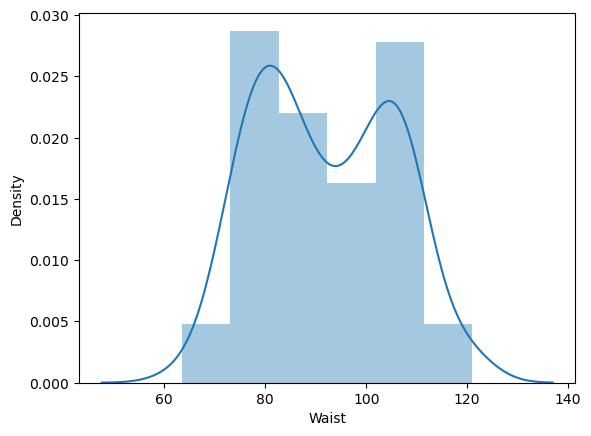

In [33]:
sns.distplot(df['Waist'])

In [34]:
sns.kdeplot(df['AT'])

<AxesSubplot:xlabel='AT', ylabel='Density'>

In [35]:
sns.scatterplot(df['Waist'],df['AT'])

<AxesSubplot:xlabel='Waist', ylabel='AT'>

In [37]:
df.corr()

Waist        AT
Waist  1.000000  0.818558
AT     0.818558  1.000000

In [38]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

In [39]:
import statsmodels.formula.api as smf

In [40]:
model=smf.ols('Waist~AT',data=df).fit()

In [41]:
model.params

Intercept    72.163315
AT            0.193716
dtype: float64

In [42]:
x=500
y=0.19*+72.16
y

13.7104

In [43]:
print (f"t value is\n{model.tvalues}\nP value is \n{model.pvalues}")

t value is
Intercept    47.025363
AT           14.740376
dtype: float64
P value is 
Intercept    2.697170e-73
AT           1.618607e-27
dtype: float64


In [44]:
model.rsquared

0.6700368930528429

In [45]:
#import data 
#Create / fit the data in model
#Get the prediction

In [46]:
model=smf.ols('AT~Waist',data=df).fit()

In [47]:
newdf=pd.Series([40,55,120])
newdf=pd.DataFrame(newdf,columns=['Waist'])

newdf

Waist
0     40
1     55
2    120

In [50]:
model.predict(newdf)

0    -77.627112
1    -25.744221
2    199.081639
dtype: float64

In [51]:
df

Waist      AT
0     74.75   25.72
1     72.60   25.89
2     81.80   42.60
3     83.95   42.80
4     74.65   29.84
..      ...     ...
104  100.10  124.00
105   93.30   62.20
106  101.80  133.00
107  107.90  208.00
108  108.50  208.00

[109 rows x 2 columns]

In [52]:
df['Waist']

0       74.75
1       72.60
2       81.80
3       83.95
4       74.65
        ...  
104    100.10
105     93.30
106    101.80
107    107.90
108    108.50
Name: Waist, Length: 109, dtype: float64

In [53]:
df['Waist'].min()

63.5

In [54]:
df['Waist'].max()

121.0